In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Read the dataset

In [2]:
red_wine_data = pd.read_csv('winequality-red.csv', sep=";")

In [3]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warni

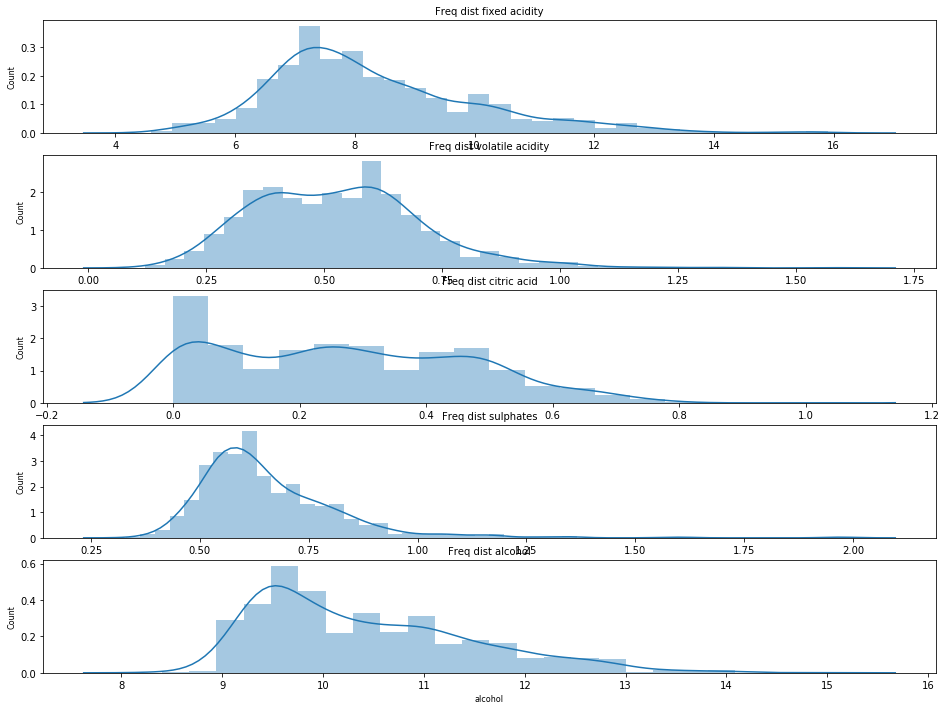

In [4]:
import seaborn as sns
col_names = ['fixed acidity','volatile acidity', 'citric acid', 'sulphates', 'alcohol']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(red_wine_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [5]:
red_wine_data['norm'] = (1+red_wine_data['alcohol'])/2 # (-1,1] -> (0,1]
red_wine_data['lognorm'] = np.log(red_wine_data['norm'])

In [6]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,norm,lognorm
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.2,1.648659
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.4,1.686399
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.4,1.686399
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.4,1.686399
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.2,1.648659


In [14]:
red_wine_data['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

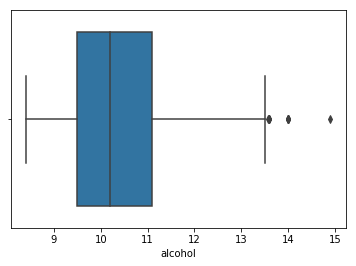

In [18]:
sns.boxplot(red_wine_data['alcohol'])

In [12]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

red_wine_data["alcohol"].apply(np.log)
normalized = normalize(red_wine_data['alcohol'])

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


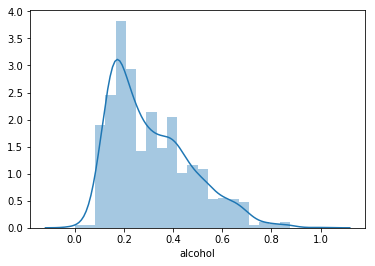

In [16]:
sns.distplot(normalized, hist=True)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


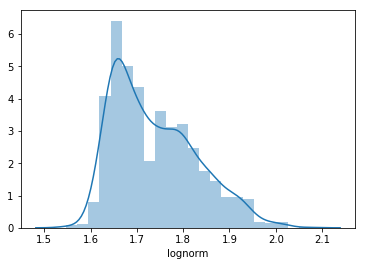

In [11]:
sns.distplot(red_wine_data['lognorm'], hist=True)

In [17]:
red_wine_data['lognorm'].describe()

count    1599.000000
mean        1.738311
std         0.090434
min         1.547563
25%         1.658228
50%         1.722767
75%         1.800058
max         2.073172
Name: lognorm, dtype: float64

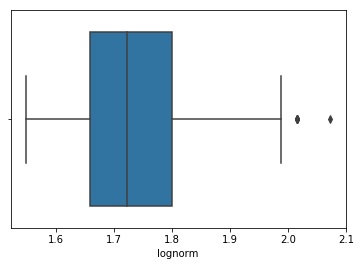

In [19]:
sns.boxplot(red_wine_data['lognorm'])

In [4]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Performing Feature Selection

In [5]:
corr = red_wine_data.corr()

In [6]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### We compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = red_wine_data.columns[columns]
red_wine_data = red_wine_data[selected_columns]

In [8]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Selecting columns based on p-value

In [10]:
selected_columns = selected_columns[:-1].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(red_wine_data.iloc[:,:-1].values, red_wine_data.iloc[:,-1].values, SL, selected_columns)

In [11]:
result = pd.DataFrame()
result['quality'] = red_wine_data.iloc[:,-1]

In [12]:
result.head()

,quality
0,5
1,5
2,5
3,6
4,5


### Newly Selected Dataset

In [13]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.70,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
result['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Visualize the distribution of the data

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warni

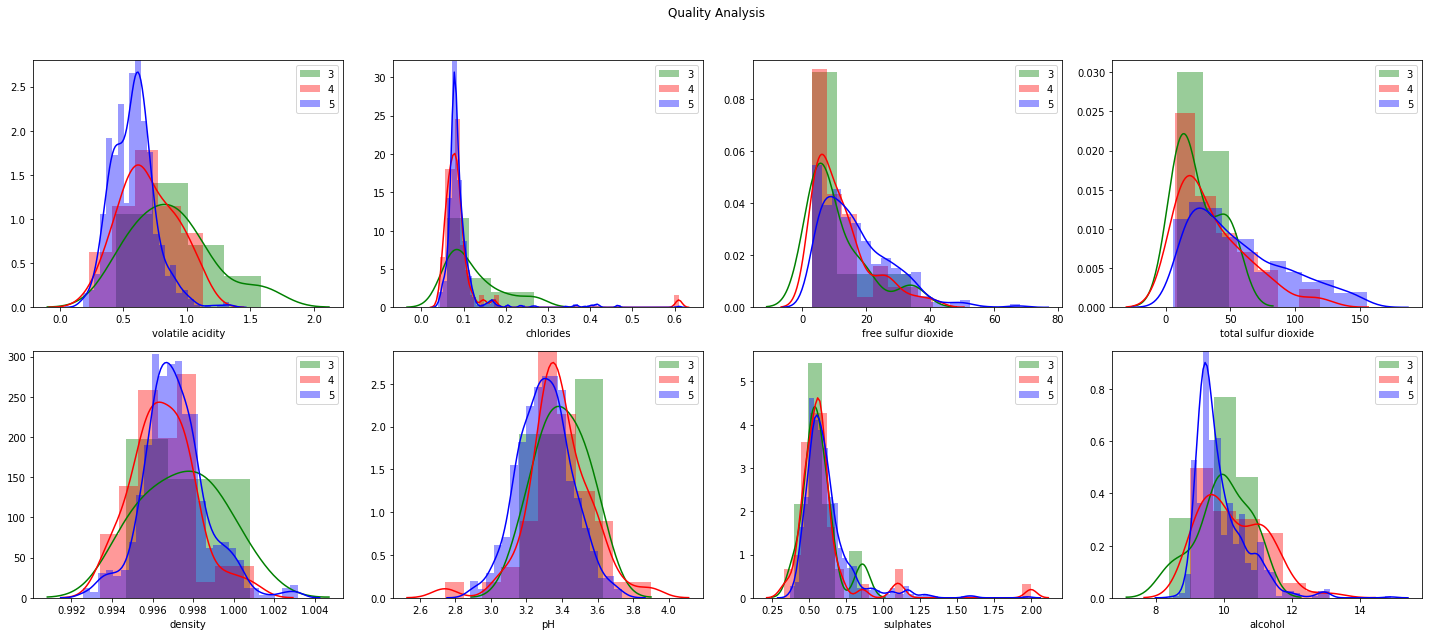

In [15]:
import seaborn as sns
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['quality']==3], color='g', label = '3')
    sns.distplot(data[i][result['quality']==4], color='r', label = '4')
    sns.distplot(data[i][result['quality']==5], color='b', label = '5')
    plt.legend(loc='best')
fig.suptitle('Quality Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [16]:
data.dtypes

volatile acidity        float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

# Models
### 1. KNN
### 2. DT
### 3. SVM
### 4. Random Forest
# Evaluation metrics
### - Jaccard index

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#X = red_wine_data.iloc[:,0:11]
#X = red_wine_data[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]
X = data
# normalize X
X_scaled = StandardScaler().fit(X).transform(X.astype(float))
Y = red_wine_data['quality']
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2, random_state=42)

In [18]:
print("Number of training data: ", len(x_train))
print("Number of test data: ", len(x_test))

Number of training data:  1279
Number of test data:  320


# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
x_train[0:5]

array([[ 0.90601191, -0.03116947,  0.6813767 ,  1.05008877,  1.83030733,
         1.09426457,  0.48302886,  1.10483337],
       [-1.77549685, -0.45624391,  2.35491513,  3.60444201, -2.93981592,
        -0.39596939, -0.40216729,  1.38643512],
       [-0.76993107,  0.64894964, -0.94434636, -0.98731203,  0.77027994,
        -0.07200549,  0.54204194, -0.58477711],
       [ 0.87807952,  0.01133798,  0.01196132, -0.71363133,  0.10246269,
         0.05758008, -1.11032421, -0.96024611],
       [ 2.83334632, -0.30746785, -0.46619252,  0.22904665,  1.1942909 ,
         0.38154398, -0.99229806, -0.49090986]])

In [21]:
from sklearn import metrics
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
CM = []
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [22]:
mean_acc

array([0.63125 , 0.575   , 0.553125, 0.584375, 0.5875  , 0.578125,
       0.575   , 0.603125, 0.584375, 0.6     , 0.590625, 0.60625 ,
       0.596875, 0.6     , 0.575   , 0.575   , 0.575   , 0.565625,
       0.565625, 0.553125, 0.565625, 0.559375, 0.565625, 0.5625  ,
       0.559375, 0.565625, 0.559375, 0.56875 , 0.559375])

In [23]:
# the best k = 1
k = 1
knn_model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
yhat_knn = knn_model.predict(x_test)

# Decision Tree

In [24]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion="entropy")
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
yhat_dt = classifier.predict(x_test)

# SVM

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
yhat_svm = clf.predict(x_test)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
r_model = RandomForestClassifier(n_estimators=20,criterion='entropy')

In [30]:
r_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
yhat_rf = r_model.predict(x_test)

In [32]:
y_train_nn = pd.get_dummies(y_train)
y_test_nn = pd.get_dummies(y_test)

## NN

In [42]:
from keras.models import Sequential
from keras.layers import Dense
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=8, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#train model
#model.fit(x_train, y_train_nn, validation_split=0.2, epochs=50, verbose=1)

# Accuracy Evaluation

## KNN

In [34]:
from sklearn.metrics import jaccard_similarity_score
knn_score = jaccard_similarity_score(y_test, yhat_knn)
knn_score

0.63125

## Decision Tree

In [35]:
dt_score = jaccard_similarity_score(y_test, yhat_dt)
dt_score

0.590625

## SVM

In [36]:
svm_score = jaccard_similarity_score(y_test, yhat_svm)
svm_score

0.596875

## Random Forest

In [37]:
rf_score = jaccard_similarity_score(y_test, yhat_rf)
rf_score

0.628125

In [38]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, yhat_rf))  

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  2 96 30  2  0]
 [ 0  1 34 86 11  0]
 [ 0  0  1 21 19  1]
 [ 0  0  0  1  4  0]]


## NN

### Evaluate The Model with k-Fold Cross Validation

In [43]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

estimator = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)

In [44]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [45]:
results = cross_val_score(estimator, x_train, y_train_nn, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 61.14% (4.69%)
